<a href="https://colab.research.google.com/github/BullDF/JSC270_A3_YMENG/blob/main/notebook.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# JSC270 Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

## Part 1: Approximating $\pi$

**a) Suppose you can only generate pairs of uniform random numbers between 0 and 1 (i.e. points within a unit square centered at (1/2, 1/2)). Describe a method to approximate $\pi$ by generating many pairs of these uniform random numbers. Implement your method in your notebook to obtain an estimate of $\pi$.**

In [2]:
np.random.seed(270) # Set seed for reproducibility
n = 1000000 # Set the number of simulations
d = np.zeros(n) # Initialize the array
o = np.array([0.5, 0.5]) # Fix the origin

for i in range(n):
    p = np.random.rand(2) # Generate a pair within the unit square
    d[i] = (np.linalg.norm(p - o)) # Compute and add the distance to the initialized array

In [3]:
pi_hat = len(d[d <= 0.5]) / n * 4 # Compute pi approximation
pi_hat

3.143524

**b) How many pairs of uniform numbers did you generate in your implementation from (a) and why?  How close is your estimate to $\pi$?**

In [4]:
pi_hat - np.pi

0.001931346410207091

## Part 2: Understand Bias

**a) Run a simulation to compare the bias of the above two estimators for $\sigma^2$ in your notebook. Specifically, consider sample sizes of $n = 10, 25, 50, 100, 250, 500$. For each sample size, generate the $n$ samples independently from a normal distribution with mean $2$ and standard deviation $2$ and compute both estimators. Repeat this process 1000 times for each sample size. With the 1000 estimates, compute the bias of both estimators for $\sigma^2$ for each sample size.**

In [6]:
## Define variance estimators
def variance_estimators(sample: np.array) -> Tuple[float, float]:
    n = len(sample) # Define sample size
    sample_variance = 0 # Initialize return value
    sample_mean = np.mean(sample) # Compute sample mean
    for num in sample:
        sample_variance += (num - sample_mean) ** 2 # Compute squared difference
    return sample_variance / (n - 1), sample_variance / n

In [7]:
sample_sizes = [10, 25, 50, 100, 250, 500] # Set sample sizes
np.random.seed(270) # Set seed for reproducibility
true_variance = 4 # Since std = 2, var = 4
num_trials = 1000 # Set number of trials
bias1, bias2 = [], [] # Initialize lists for biases

for n in sample_sizes: # Run simulation for all sample sizes
    sample_variances1, sample_variances2 = np.zeros(num_trials), np.zeros(num_trials) # Initialize arrays to hold sample variance estimates
    for i in range(num_trials): # Run simulation 1000 times for each sample size
        sample = np.random.normal(2, 2, n) # Generate n normal data
        variance_estimate1, variance_estimate2 = variance_estimators(sample) # Compute sample variance
        sample_variances1[i] = variance_estimate1 # Record estimate in array
        sample_variances2[i] = variance_estimate2 # Record estimate in array
        
    sample_bias1 = np.mean(sample_variances1) - true_variance # Compute bias for estimator 1
    sample_bias2 = np.mean(sample_variances2) - true_variance # Compute bias for estimator 2
    bias1.append(sample_bias1) # Record sample bias
    bias2.append(sample_bias2) # Record sample bias

**b) Make a plot of bias vs. sample size for the two estimators. What do you observe? Is this behavior expected?**

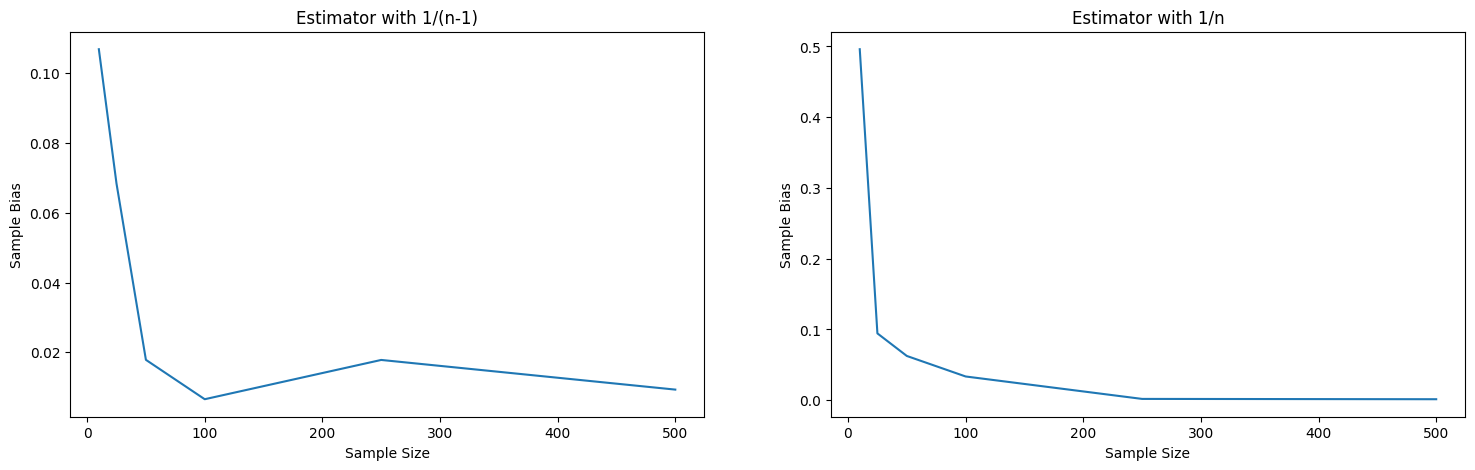

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) # Define grid for plots

## Create line plot for estimator 1
sns.lineplot(x=sample_sizes, y=np.abs(bias1), ax=ax1)
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Sample Bias')
ax1.set_title('Estimator with 1/(n-1)')

## Create line plot for estimator 2
sns.lineplot(x=sample_sizes, y=np.abs(bias2), ax=ax2)
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Sample Bias')
ax2.set_title('Estimator with 1/n')

plt.show()

## Part 4: Asymptotic Behavior

**a) Let’s run a simulation to investigate the behavior of the sample mean. Consider sample sizes of $n = 10, 25, 50, 100, 250, 500, 2000, 5000$. For each sample size, generate the $n$ samples independently from an exponential distribution with a mean (or expected value) of $2$. Compute the empirical mean in each sample. Plot the value of the empirical mean vs. the sample size with a horizontal line at 2.**

In [9]:
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000] # Set sample sizes
np.random.seed(2023) # Set seed for reproducibility
sample_means = [] # Initialize list for sample means
for n in sample_sizes:
    sample = np.random.exponential(2, n) # Generate exponential data
    sample_means.append(np.mean(sample)) # Record sample mean

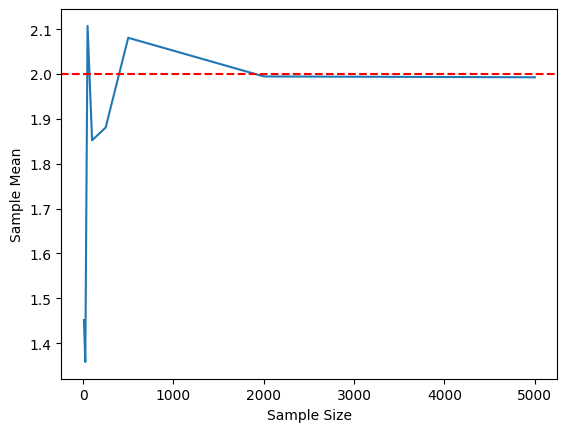

In [10]:
sns.lineplot(x=sample_sizes, y=sample_means) # Create line plot
plt.xlabel('Sample Size') # Set x label
plt.ylabel('Sample Mean') # Set y label
plt.axhline(y=2, color='r', linestyle='--') # Add horizontal line at 2
plt.show()

In [11]:
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000] # Set sample sizes
np.random.seed(2023) # Set seed for reproducibility
means = [] # Initialize list for sample means
num_trials = 1000 # Set number of trials
for n in sample_sizes:
    sample_means = np.zeros(num_trials) # Initialize array for sample means
    for i in range(num_trials):
        sample = np.random.exponential(2, n) # Generate exponential data
        sample_means[i] = np.mean(sample) # Record sample mean
    means.append(np.mean(sample_means)) # Compute grand mean for this sample size

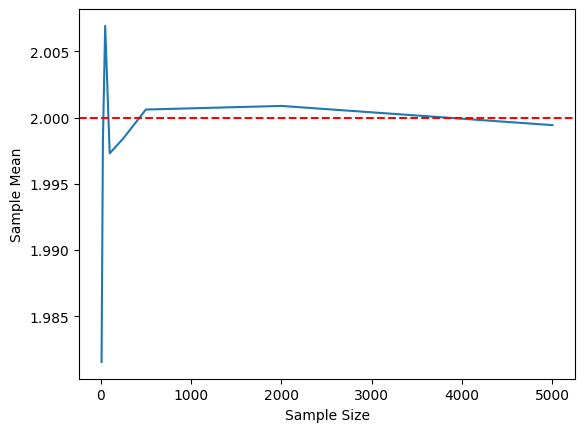

In [12]:
sns.lineplot(x=sample_sizes, y=means) # Create line plot
plt.xlabel('Sample Size') # Set x label
plt.ylabel('Sample Mean') # Set y label
plt.axhline(y=2, color='r', linestyle='--') # Add horizontal line at 2
plt.show()

**b) Again consider sample sizes of $n = 10, 25, 50, 100, 250, 500, 2000, 5000$. For each sample size, generate the $n$ samples independently from a standard Cauchy distribution (location and scale parameters equal to $0$ and $1$, respectively) and compute the empirical mean. Repeat this process 1000 times for each sample size. Make a histogram of the 1000 empirical means for each sample size.**

In [13]:
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000] # Set sample sizes
np.random.seed(370) # Set seed for reproducibility
num_trials = 1000 # Set number of trials
means = [] # Initialize list for grand means
for n in sample_sizes:
    sample_means = np.zeros(num_trials) # Initialize array for sample means
    for i in range(num_trials):
        sample = np.random.standard_cauchy(n) # Generate exponential data
        sample_means[i] = np.mean(sample) # Record sample mean
    means.append(sample_means) # Compute grand mean for this sample size

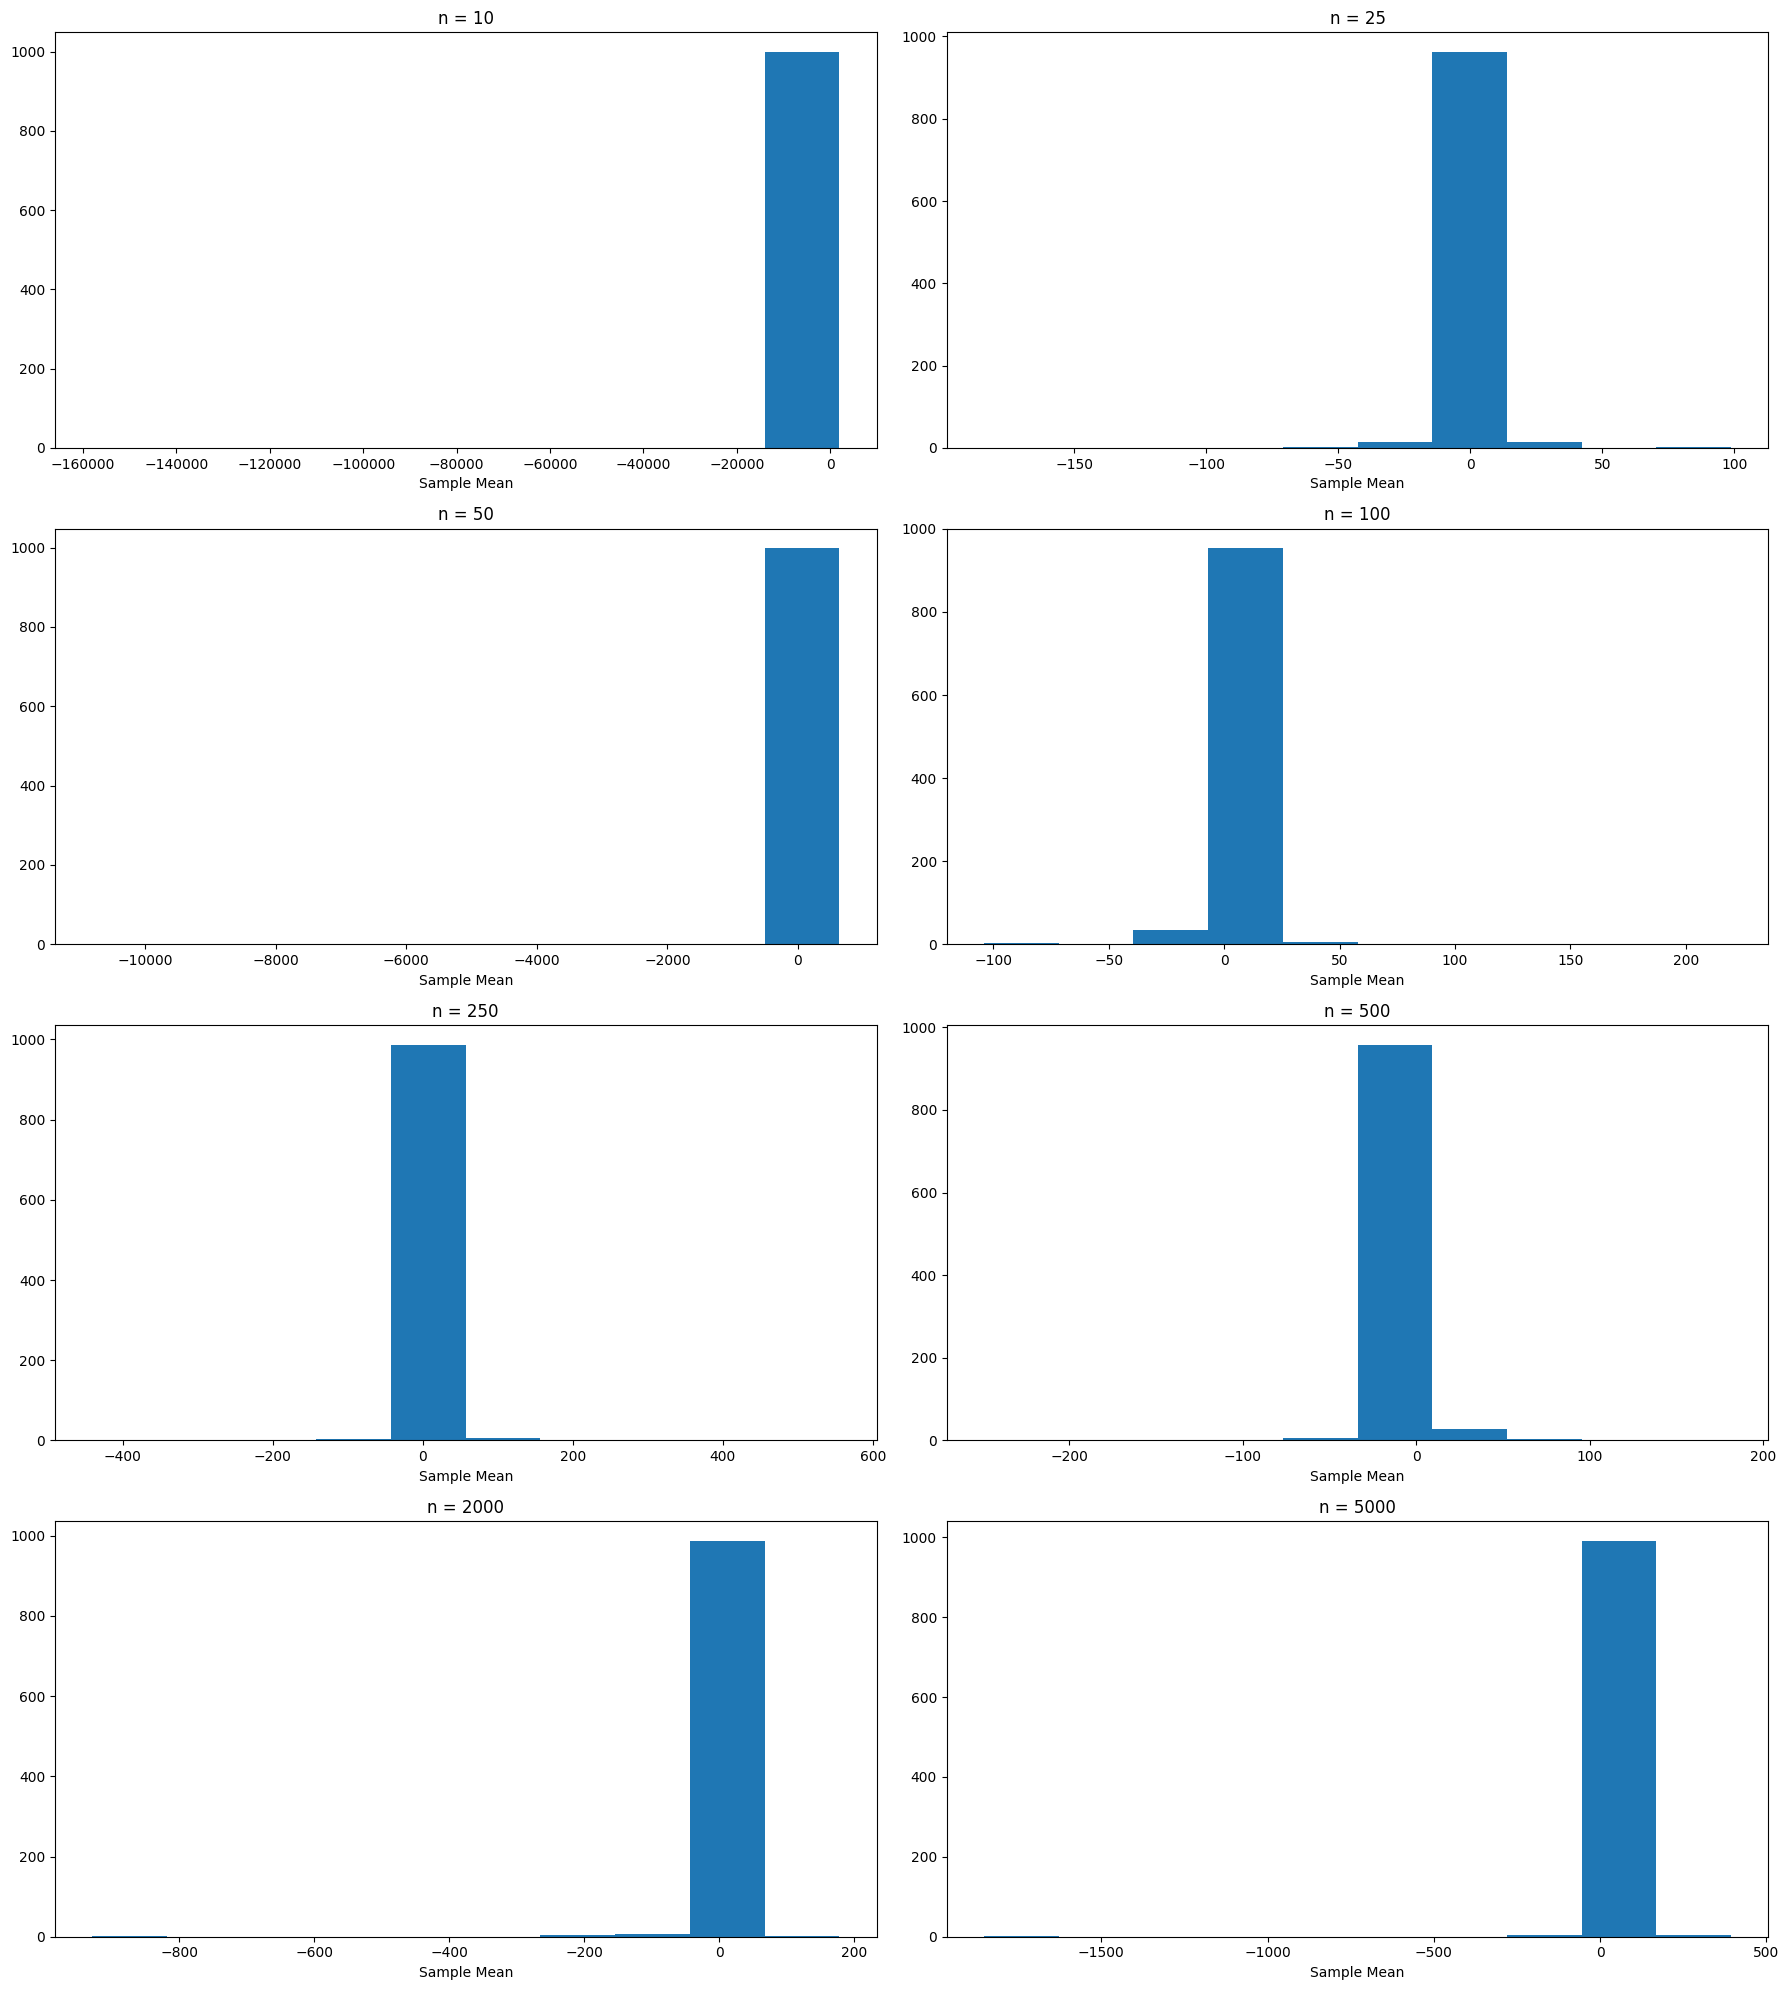

In [22]:
fig, axs = plt.subplots(4, 2, figsize=(18, 20)) # Create grid for plots
for i in range(4): # Iterate over rows
    for j in range(2): # Iterate over columns
        axs[i][j].hist(x=means[2 * i + j]) # Create histogram
        axs[i][j].set_title(f'n = {sample_sizes[2 * i + j]}') # Set title
        axs[i][j].set_xlabel('Sample Mean') # Set x label
plt.tight_layout() # Improve looking
plt.show()